In [30]:
# Data handling
import pandas as pd
import numpy as np

# Train-test split
from sklearn.model_selection import train_test_split

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Performance metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")




In [9]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-794778078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-794778078.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [11]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [15]:
# Drop unwanted columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')



In [18]:
#check columns
df.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.dtypes


,0
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Sex_male,int64
Embarked_Q,int64
Embarked_S,int64


In [31]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is Alone
df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)

# Age Group (categorical bins)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,20,40,60,80], labels=[0,1,2,3,4]).astype(int)


In [32]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
print(df[bool_cols])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[891 rows x 0 columns]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
model = LogisticRegression(
    max_iter=2000,  # Ensure convergence
    C=0.5,          # Regularization strength
    solver='liblinear'
)

model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]



In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


Accuracy : 0.8101
Precision: 0.7857
Recall   : 0.7432
F1-score : 0.7639
ROC-AUC  : 0.8824


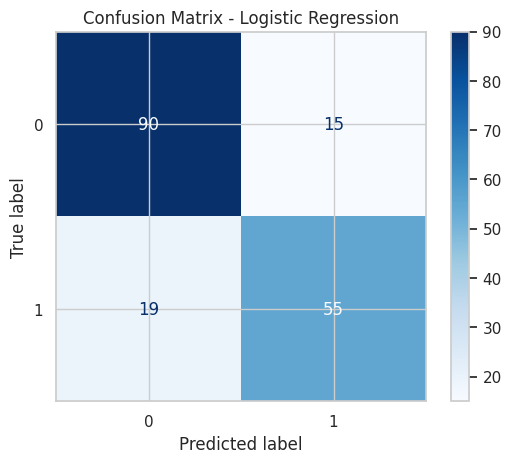

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


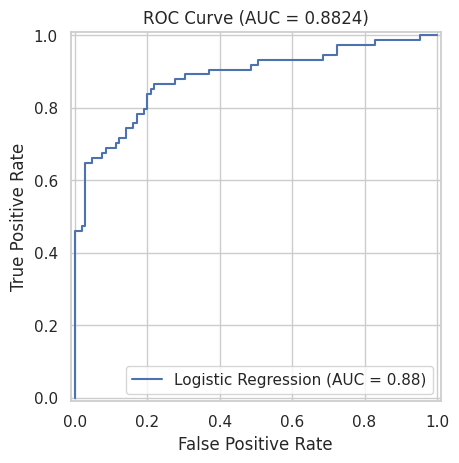

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

RocCurveDisplay(
    fpr=fpr,
    tpr=tpr,
    roc_auc=roc_auc,
    estimator_name="Logistic Regression"
).plot()

plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()



<Figure size 640x480 with 0 Axes>

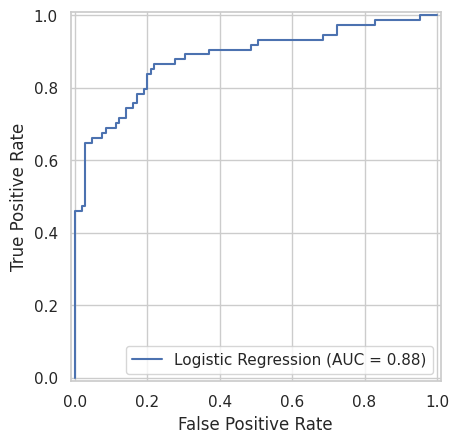

In [39]:
# Confusion Matrix
disp.figure_.savefig("confusion_matrix.png", dpi=300)

# ROC Curve
plt.figure()
RocCurveDisplay(
    fpr=fpr,
    tpr=tpr,
    roc_auc=roc_auc,
    estimator_name="Logistic Regression"
).plot()
plt.savefig("roc_curve.png", dpi=300)
plt.show()
